# DSC540 Project 3

DePaul University  
Ilyas Ustun, PhD  
twitter: \_ilyas\_ustun\_  

## Rules
- Write your code under the corresponding questions where you see `# Code here`. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   

Good Luck!

### Ming Yang

**Honor Pledge:**  
I pledge on my honor that I, **Ming Yang**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

In this project we will be analyzing CO and NOX gas emissions from a power plant. The variables, their meanings and some statistics are given in the table below.

![PowerPlantEmissionsFeaturesTable](PowerPlantEmissionsFeaturesTable.PNG)

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [2]:
import sklearn
sklearn.__version__

'0.23.2'

In [3]:
pd.set_option('display.max_columns', 100)
RANDOM_STATE = 0

### These are the packages I used

In [4]:
# Your package imports here

In [5]:
import warnings
warnings.filterwarnings('ignore')

> NOTE: For the Kernel RBF SVM hyper parameter tuning use these parameters in the questions:
        
        'C': [1, 10, 100, 1000]
        'gamma': [0.001, 0.01, 0.1, 1]

## Q1 [10]
- Read in the dataset
- How many rows and variables are there?


#### Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [6]:
df = pd.read_csv('gas_emissions.csv')

In [7]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


#### Is there any missing data?

In [8]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

#### What is the average value of AP for those points who have CO levels above 3 $mg/m^3$?

In [9]:
df.loc[df['CO']>3, 'AP'].mean()

1015.6900173490633

#### Create a correlation map between the variables. Which variables have high correlation?

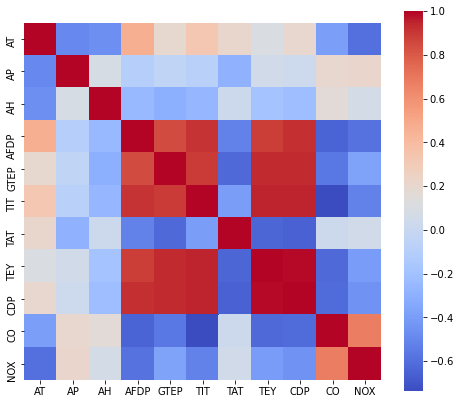

In [10]:
corr = df.corr()
ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(
    corr, 
    cmap="coolwarm",
    square=True  
)

In [11]:
#Which variables have high correlation?


#### Create a scatter plot of 'TEY' vs 'CDP'

<AxesSubplot:xlabel='CDP', ylabel='TEY'>

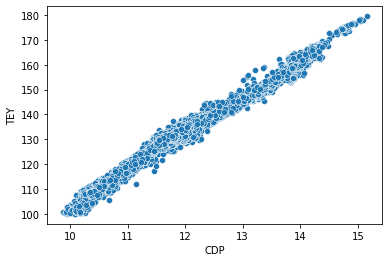

In [12]:
sns.scatterplot(data = df, x='CDP', y='TEY')

#### Create histograms for CO and NOX.

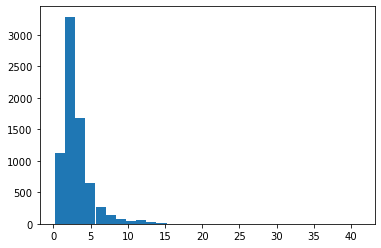

In [13]:
plt.hist(df['CO'], density=False, bins=30)
plt.show()

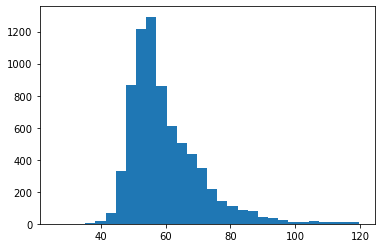

In [14]:
plt.hist(df['NOX'], density=False, bins=30)
plt.show()

#### Create a sctter plot of CO vs NOX.

<AxesSubplot:xlabel='NOX', ylabel='CO'>

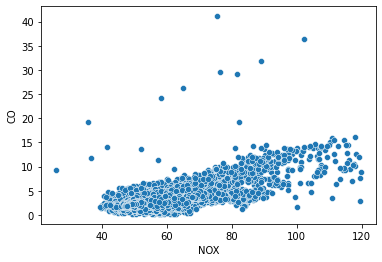

In [15]:
sns.scatterplot(data = df, x='NOX', y='CO')

### Prepare data from machine learning

We will predict CO using all the other variables. NOX, which is another emission gas, will not be used as predictor.

In [16]:
y = df.CO
X = df.drop(['CO', 'NOX'], axis=1)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

In [18]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [19]:
X_train.shape

(5316, 9)

In [20]:
X_val.shape

(1329, 9)

In [21]:
X_test.shape

(739, 9)

## Utility Functions

You can create helper functions.
For example, create functions that take the score and store it ina dataframe for a specific model.

## Q2 [10]

- Apply Linear Regression. Predict CO emission using other variables.
    - What is the model $R^2$ on training data?
    - What is the $R^2$ on validation data?
    - What is the Root Mean Squared Error (RMSE) on training data?
    - What is the RMSE on validation data?
    
> - $R^2$ higher is better. ($R^2$ is % variation in data being explained)  
> - RMSE lower is better. (RMSE is error, meaning the difference between predictions and actual data)  

Hint:  
- You can use the `r2_score` and `mean_squared_error` methods in `sklearn.metrics`.   
- You need to take the square root of Mean Squared Error to get to RMSE. (MSE $->$ square root $->$ RMSE)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [23]:
# CODE
linearR = LinearRegression()
linearR.fit(X_train, y_train)

LinearRegression()

In [24]:
#What is the model R^2 on training data?
#What is the R^2 on validation data?
pred_train = linearR.predict(X_train)
pred_val = linearR.predict(X_val)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R^2 on training data: ", r2_train )
print("R^2 on validation data: ",r2_val)

R^2 on training data:  0.6640090820784397
R^2 on validation data:  0.646343190818214


In [25]:
#What is the Root Mean Squared Error (RMSE) on training data?
#What is the RMSE on validation data?
from math import sqrt
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))

print("RMSE on training data: ", rmse_train)
print("RMSE on validation data: ",rmse_val)

RMSE on training data:  1.2720122104103535
RMSE on validation data:  1.3884894690085985


## Q3 [10]

- Apply Random Forest Regression with 100 trees. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

- Is training and validation score close? If not what might be the problem?
- If there is a large gap, try to decrease the gap by changing some hyperparameters of the Random Forest model. (In this analysis, any difference more than 0.10 $R^2$ difference can be assumed to be large.)
    - Once you reach a difference of less than or close to 0.10 between training $R^2$ and validation $R^2$ you can stop. 
    - During this process your training score will probably decrease, and that is OK. 

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
# CODE
randomFR = RandomForestRegressor(n_estimators=100, random_state=42)
randomFR.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
#What is the model R^2 on training data?
#What is the R^2 on validation data?
pred_train = randomFR.predict(X_train)
pred_val = randomFR.predict(X_val)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R^2 on training data: ", r2_train )
print("R^2 on validation data: ",r2_val)

R^2 on training data:  0.966747859625149
R^2 on validation data:  0.7548636349625206


In [29]:
#What is the Root Mean Squared Error (RMSE) on training data?
#What is the RMSE on validation data?
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))

print("RMSE on training data: ", rmse_train)
print("RMSE on validation data: ",rmse_val)

RMSE on training data:  0.4001633533170932
RMSE on validation data:  1.1559936515436304


In [30]:
# The R^2 on training data is 96.67% and R^2 on validation data is 75.49%. The difference is significantly big. 
# The rmse on training data is 0.4 and on validation data is 1.16. The difference on RMSE is also significantly big.
# From the numbers, the random forest regression model might have the overfitting problem.

In [31]:
#decrease the gap by changing some hyperparameters of the Random Forest model.
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [5, 10, 30, 50, 70, 100, 150],
          'max_depths': [2, 4, 8, 10, 30, 50, 100]}

In [32]:
temp = []
for n_estimator in params['n_estimators']:
    for max_depth in params['max_depths']:
        newrf = RandomForestRegressor(n_estimators = n_estimator,max_depth = max_depth)
        newrf.fit(X_train, y_train)
            
        pred_train = newrf.predict(X_train)
        pred_val = newrf.predict(X_val)
        r2_train = metrics.r2_score(y_train, pred_train)
        r2_valid = metrics.r2_score(y_val, pred_val)
            
        if abs(r2_train-r2_val) <= 0.1:
            temp.append((n_estimator, max_depth, r2_train, r2_valid))

In [33]:
print('The r^2 gap is less than or close to 0.1 when:')
print('n_estimator'+ ' ' + 'max_depth'+ ' ' + 'r2_train'+ ' ' + 'r2_valid')
for n_estimator, max_depth, r2_train, r2_valid in temp:
    print(str(n_estimator) + '           ' + str(max_depth) + '          ' + str("{:.2f}".format(r2_train) )+ '     ' + str("{:.2f}".format(r2_valid)))

The r^2 gap is less than or close to 0.1 when:
n_estimator max_depth r2_train r2_valid
5           2          0.70     0.69
5           4          0.80     0.74
10           2          0.71     0.69
10           4          0.80     0.74
30           2          0.71     0.69
30           4          0.80     0.74
50           2          0.71     0.69
50           4          0.80     0.74
70           2          0.71     0.69
70           4          0.80     0.74
100           2          0.71     0.69
100           4          0.81     0.74
150           2          0.71     0.69
150           4          0.80     0.74


## Q4 [10]

- Apply Support Vector Regression. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Apply the process above using **linear kernel SVR**, **polynomial kernel SVR**, and **RBF kernel SVR** with the default parameters.

- Take RBF Kernel SVM and perform some hyperparameter tuning. See if you can increase the $R^2$ score.   
    - Use:  
          'C': [1, 10, 100, 1000]
          'gamma': [0.001, 0.01, 0.1, 1]  
    - During this process this make sure it doesn't overfit the data. 
    - Look into the `C` and `gamma` values.

In [34]:
from sklearn.svm import SVR

#### linear kernel SVR

In [35]:
SVR_reg = SVR(kernel='linear')
SVR_reg.fit(X_train, y_train)

SVR(kernel='linear')

In [36]:
#What is the model R^2 on training data?
#What is the R^2 on validation data?
pred_train = SVR_reg.predict(X_train)
pred_val = SVR_reg.predict(X_val)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 on training data: ", r2_train )
print("R2 on validation data: ",r2_val)

R2 on training data:  0.6244509939105645
R2 on validation data:  0.6021866187568015


In [37]:
#What is the Root Mean Squared Error (RMSE) on training data?
#What is the RMSE on validation data?
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))

print("RMSE on training data: ", rmse_train)
print("RMSE on validation data: ",rmse_val)

RMSE on training data:  1.344809658561098
RMSE on validation data:  1.4726219576265938


#### polynomial kernel SVR 

In [38]:
KSVR_reg = SVR(kernel='poly')
KSVR_reg.fit(X_train, y_train)

SVR(kernel='poly')

In [39]:
#What is the model R^2 on training data?
#What is the R^2 on validation data?
pred_train = KSVR_reg.predict(X_train)
pred_val = KSVR_reg.predict(X_val)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 on training data: ", r2_train )
print("R2 on validation data: ",r2_val)

R2 on training data:  0.7404852376508437
R2 on validation data:  0.7310487212257788


In [40]:
#What is the Root Mean Squared Error (RMSE) on training data?
#What is the RMSE on validation data?
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))

print("RMSE on training data: ", rmse_train)
print("RMSE on validation data: ",rmse_val)

RMSE on training data:  1.1179143857689002
RMSE on validation data:  1.2108445318365113


#### RBF kernel SVR

In [41]:
rbfSVR_reg = SVR(kernel='rbf')
rbfSVR_reg.fit(X_train, y_train)

SVR()

In [42]:
#What is the model R^2 on training data?
#What is the R^2 on validation data?
pred_train = rbfSVR_reg.predict(X_train)
pred_val = rbfSVR_reg.predict(X_val)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 on training data: ", r2_train )
print("R2 on validation data: ",r2_val)

R2 on training data:  0.7653237087525571
R2 on validation data:  0.7476206398521968


In [43]:
#What is the Root Mean Squared Error (RMSE) on training data?
#What is the RMSE on validation data?
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))

print("RMSE on training data: ", rmse_train)
print("RMSE on validation data: ",rmse_val)

RMSE on training data:  1.0630706284209859
RMSE on validation data:  1.1729472882611478


#### Take RBF Kernel SVM and perform some hyperparameter tuning. 

In [44]:
rbfsvr = GridSearchCV(SVR(kernel='rbf'), param_grid={"C": [1, 10, 100, 1000], "gamma": [0.001, 0.01, 0.1, 1]}, scoring='r2')
rbfsvr.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='r2')

In [182]:
rbfsvr.best_params_

{'C': 1000, 'gamma': 0.01}

In [183]:
rbfsvr.best_score_

0.7851026548753246

In [48]:
#What is the model R^2 on training data?
#What is the R^2 on validation data?
pred_train = rbfsvr.predict(X_train)
pred_val = rbfsvr.predict(X_val)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 on training data: ", r2_train )
print("R2 on validation data: ",r2_val)

R2 on training data:  0.7922417333505161
R2 on validation data:  0.7568567058132334


## Q5 [10]

- Apply PCA and transform the data. 
- For PCA we need to decide on the number of  components. Take sufficient number of components based on variance explained (generally it is chosen as the number of components that can explain 90% of the variance) and/or validation accuracy using the optimum RBF Kernel model obtained before.
- Use the PCA transformed data to perform regression.
- Apply Linear Regression, Random Forest Regression, and RBF Kernel Support Vector Regression.
For each model:
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Compare these models with their counterparts obtained before. For example: Compare PCA RBF SVR with the RBF SVR model from before. Use the best hyperparameters of the RBF SVR obtained before to fit the RBF SVR onto the PCA transformed data. Any change in performance? Please explain. 
- Perform hyperparameter tuning of RBF SVR using PCA transformed data. Any improvement?
    - Use:  
       'C': [1, 10, 100, 1000]  
       'gamma': [0.001, 0.01, 0.1, 1]  


In [84]:
from sklearn.decomposition import PCA

In [85]:
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)

[0.58158952 0.78924196 0.88751722 0.94337792 0.98704348 0.9959942
 0.99975821 0.99992456 1.        ]


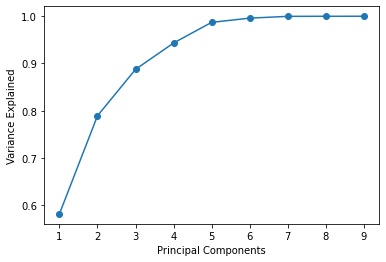

In [86]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

In [87]:
# Code
#Apply PCA and transform the data.
pca = PCA(n_components = 5)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

#### Linear Regression

In [88]:
pca_reg = LinearRegression()
pca_reg.fit(X_train_pca, y_train)

LinearRegression()

In [89]:
#What is the model R^2 on training data?
#What is the R^2 on validation data?
pred_train = pca_reg.predict(X_train_pca)
pred_val = pca_reg.predict(X_val_pca)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 on training data: ", r2_train )
print("R2 on validation data: ",r2_val)

R2 on training data:  0.6557906042002006
R2 on validation data:  0.6333206399655549


In [90]:
#What is the Root Mean Squared Error (RMSE) on training data?
#What is the RMSE on validation data?
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))

print("RMSE on training data: ", rmse_train)
print("RMSE on validation data: ",rmse_val)

RMSE on training data:  1.2874751982855395
RMSE on validation data:  1.413822244602062


#### Random Forest Regression

In [91]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state= RANDOM_STATE)
rf_reg.fit(X_train_pca, y_train)

RandomForestRegressor(random_state=0)

In [92]:
#What is the model R^2 on training data?
#What is the R^2 on validation data?
pred_train = rf_reg.predict(X_train_pca)
pred_val = rf_reg.predict(X_val_pca)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 on training data: ", r2_train )
print("R2 on validation data: ",r2_val)

R2 on training data:  0.9631010677885874
R2 on validation data:  0.7374990210792542


In [93]:
#What is the Root Mean Squared Error (RMSE) on training data?
#What is the RMSE on validation data?
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))

print("RMSE on training data: ", rmse_train)
print("RMSE on validation data: ",rmse_val)

RMSE on training data:  0.4215357479292904
RMSE on validation data:  1.196236478242819


#### RBF Kernel Support Vector Regression

In [94]:
svr_reg = SVR(kernel='rbf', C=1000, gamma=0.01)
svr_reg.fit(X_train_pca, y_train)

SVR(C=1000, gamma=0.01)

In [95]:
#What is the model R^2 on training data?
#What is the R^2 on validation data?
pred_train = svr_reg.predict(X_train_pca)
pred_val = svr_reg.predict(X_val_pca)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 on training data: ", r2_train )
print("R2 on validation data: ",r2_val)

R2 on training data:  0.785297815333706
R2 on validation data:  0.7520177672123047


In [96]:
#What is the Root Mean Squared Error (RMSE) on training data?
#What is the RMSE on validation data?
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))

print("RMSE on training data: ", rmse_train)
print("RMSE on validation data: ",rmse_val)

RMSE on training data:  1.0168238937503595
RMSE on validation data:  1.162684441733868


#### Perform hyperparameter tuning of RBF SVR using PCA transformed data.

In [97]:
svrreg = GridSearchCV(SVR(kernel='rbf'),param_grid={"C": [1, 10, 100, 1000],"gamma": [0.001, 0.01, 0.1, 1]}, scoring='r2')
svrreg.fit(X_train_pca, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='r2')

In [99]:
svrreg.best_params_

{'C': 1000, 'gamma': 0.01}

In [100]:
#What is the model R^2 on training data?
#What is the R^2 on validation data?
pred_train = svrreg.predict(X_train_pca)
pred_val = svrreg.predict(X_val_pca)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 on training data: ", r2_train )
print("R2 on validation data: ",r2_val)

R2 on training data:  0.785297815333706
R2 on validation data:  0.7520177672123047


## Q6 [10]

- Apply Kernel PCA (KPCA) and transform the data. 
- After the kernel transformation of your data, the vectors live in a high dimensional feature space. (Assuming there were N rows in the data, this will mean NxN space)
    - That's why in KPCA you will (in many cases) have more dimensions than your original number of features! 
    - The full returned matrix will be NxN size. 
    - Here we will select 50 components to cut on training time, otherwise it might take too long.
    - Optional: You can start with let's say 500 components, and then find a more optimal value by checking the validation score of a model (RF, SVR, etc.) using different number of components.
- Use the KPCA transformed data to perform regression.
- Now apply Linear Regression, Random Forest Regression, and RBF Kernel Support Vector Regression.
For each model:
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Compare these models with their counterparts fit on the standardized data, and PCA transformed data. For example: Compare KPCA SVR with SVR and PCA SVR from before. Use the best hyperparameters obtained from the experiments before. 
    - Is there any change in performance when compared to models trained on original data? Please explain. 
    - Is there any change in performance when compared to models trained on PCA transformed data? Please explain. 
    
- Perform hyperparameter tuning of SVR using KPCA transformed data. Any improvement?

======== 
- What is your conclusion considering all the regression models? Which one would you choose as your final contender?

In [101]:
from sklearn.decomposition import KernelPCA

In [102]:
kpca = KernelPCA(n_components=500, kernel='rbf', n_jobs=-1, remove_zero_eig=True, random_state=RANDOM_STATE)
kpca.fit(X_train)
X_train_kpca = kpca.transform(X_train)
X_val_kpca = kpca.transform(X_val)

In [103]:
X_train_kpca2 = X_train_kpca[:, 0:50]
X_val_kpca2 = X_val_kpca[:, 0:50]

#### Linear Regression

In [104]:
# CODE
linear_reg = LinearRegression()
linear_reg.fit(X_train_kpca2, y_train)

LinearRegression()

In [105]:
#What is the model R^2 on training data?
#What is the R^2 on validation data?
pred_train = linear_reg.predict(X_train_kpca2)
pred_val = linear_reg.predict(X_val_kpca2)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 on training data: ", r2_train )
print("R2 on validation data: ",r2_val)

R2 on training data:  0.7513693063367319
R2 on validation data:  0.736145619912268


In [106]:
#What is the Root Mean Squared Error (RMSE) on training data?
#What is the RMSE on validation data?
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))

print("RMSE on training data: ", rmse_train)
print("RMSE on validation data: ",rmse_val)

RMSE on training data:  1.0942205881809457
RMSE on validation data:  1.1993162885016249


####  Random Forest Regression

In [107]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state= RANDOM_STATE)
rf_reg.fit(X_train_kpca2, y_train)

RandomForestRegressor(random_state=0)

In [108]:
#What is the model R^2 on training data?
#What is the R^2 on validation data?
pred_train = rf_reg.predict(X_train_kpca2)
pred_val = rf_reg.predict(X_val_kpca2)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 on training data: ", r2_train )
print("R2 on validation data: ",r2_val)

R2 on training data:  0.9632153146438154
R2 on validation data:  0.7533417609522715


In [109]:
#What is the Root Mean Squared Error (RMSE) on training data?
#What is the RMSE on validation data?
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))

print("RMSE on training data: ", rmse_train)
print("RMSE on validation data: ",rmse_val)

RMSE on training data:  0.4208826603437951
RMSE on validation data:  1.1595764627245213


#### RBF Kernel Support Vector Regression

In [110]:
svr_reg = SVR(kernel='rbf', C=1000, gamma=0.01)
svr_reg.fit(X_train_kpca2, y_train)

SVR(C=1000, gamma=0.01)

In [111]:
#What is the model R^2 on training data?
#What is the R^2 on validation data?
pred_train = svr_reg.predict(X_train_kpca2)
pred_val = svr_reg.predict(X_val_kpca2)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 on training data: ", r2_train )
print("R2 on validation data: ",r2_val)

R2 on training data:  0.7561273682500529
R2 on validation data:  0.7448794733460913


In [112]:
#What is the Root Mean Squared Error (RMSE) on training data?
#What is the RMSE on validation data?
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))

print("RMSE on training data: ", rmse_train)
print("RMSE on validation data: ",rmse_val)

RMSE on training data:  1.0836999257581017
RMSE on validation data:  1.1792999481681172


### SVR rbf gets the best result.

#### Perform hyperparameter tuning of SVR using KPCA transformed data.

In [113]:
svrreg = GridSearchCV(SVR(kernel='rbf'),param_grid={"C": [1, 10, 100, 1000],"gamma": [0.001, 0.01, 0.1, 1]}, scoring='r2')
svrreg.fit(X_train_kpca2, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='r2')

In [146]:
svrreg.best_params_

{'C': 10, 'gamma': 1}

In [147]:
#What is the model R^2 on training data?
#What is the R^2 on validation data?
pred_train = svrreg.predict(X_train_kpca2)
pred_val = svrreg.predict(X_val_kpca2)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 on training data: ", r2_train )
print("R2 on validation data: ",r2_val)

R2 on training data:  0.7860912319437882
R2 on validation data:  0.7500567754388686


### I would choose svr rbf model.

## Q7 [10]

#### Let's do some classification 

We will convert CO target values into binary form by comparing them to a threshold. $ 0 - 3  mg/m^3$ is the range of max 8-hour avg. ambient CO in most US cities. So let's take that.  
[CO Levels of Concern in Government Recommendations and Regulations](https://www.carbonmonoxidekills.com/are-you-at-risk/carbon-monoxide-levels/)

In [116]:
from sklearn.preprocessing import Binarizer

In [117]:
binarizer = Binarizer(threshold=3)

In [118]:
y_train_cat = binarizer.transform(y_train.values.reshape(-1,1)).ravel()
y_val_cat = binarizer.transform(y_val.values.reshape(-1,1)).ravel()
y_test_cat = binarizer.transform(y_test.values.reshape(-1,1)).ravel()

In [119]:
y_train_cat = pd.Series(y_train_cat)

<AxesSubplot:>

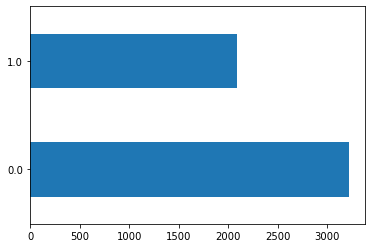

In [120]:
y_train_cat.value_counts().plot.barh()

### Fit RBF Kernel SVM Classifier

#### 1. Standardized training data 
- Using the standardized training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
     - Create confusion matrix
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
     

#### 2. PCA transformed training data 
- Using the **pca** transformed training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
         - Create confusion matrix
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score

    

#### 3. Kernel PCA transformed training data
- Using the **kernel pca** transformed training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
         - Create confusion matrix
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score

- Compare the results of Kernel RBF SVM model 1, 2, and 3. Which one is the best?
    


In [121]:
from sklearn.svm import SVC

In [122]:
estimator = SVC(kernel ='rbf')

### SVC Model 1 

In [124]:
# CODE
cv_stand = GridSearchCV(estimator,
                   param_grid={"C": [1.0, 10.0, 100.0, 1000.0],
                               "gamma": [0.001, 0.01 , 0.1 , 1]}, cv=5)
cv_stand.fit(X_train, y_train_cat)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                         'gamma': [0.001, 0.01, 0.1, 1]})

In [125]:
cv_stand.best_params_

{'C': 1.0, 'gamma': 1}

In [126]:
best_estimator = cv_stand.best_estimator_
pred_val = best_estimator.predict(X_val)

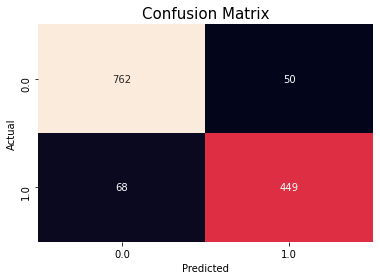

In [127]:
# Create confusion metrics
confusion_matrix =  pd.crosstab(index=np.ravel(y_val_cat), columns=pred_val.ravel(), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [129]:
print(metrics.classification_report(y_true = y_val_cat, y_pred = pred_val))
met = metrics.classification_report(y_true = y_val_cat, y_pred = pred_val,  output_dict=True)
print("\nSummary of Metrics:")
print("Sensitivity %f"%(met['1.0']['recall']))
print("Specificity %f"%(met['0.0']['recall']))
print("Precision %f"%(met['1.0']['precision']))
print("Accuracy %f"%(met['accuracy']))
print("F1-score %f"%(met['1.0']['f1-score']))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       812
         1.0       0.90      0.87      0.88       517

    accuracy                           0.91      1329
   macro avg       0.91      0.90      0.91      1329
weighted avg       0.91      0.91      0.91      1329


Summary of Metrics:
Sensitivity 0.868472
Specificity 0.938424
Precision 0.899800
Accuracy 0.911211
F1-score 0.883858


### SVC Model 2

In [130]:
# CODE
cv_pca = GridSearchCV(estimator,
                   param_grid={"C": [1.0, 10.0, 100.0, 1000.0],
                               "gamma": [0.001, 0.01 , 0.1 , 1]}, cv=5)
cv_pca.fit(X_train_pca, y_train_cat)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                         'gamma': [0.001, 0.01, 0.1, 1]})

In [131]:
cv_pca.best_params_

{'C': 1.0, 'gamma': 1}

In [132]:
best_estimator_svc2 = cv_pca.best_estimator_
pred_val_pca = best_estimator_svc2.predict(X_val_pca)

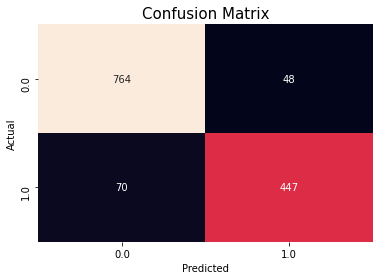

In [136]:
# Create confusion metrics
confusion_matrix =  pd.crosstab(index=np.ravel(y_val_cat), columns=pred_val_pca.ravel(), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [137]:
print(metrics.classification_report(y_true = pred_val_pca, y_pred = pred_val))
met = metrics.classification_report(y_true = pred_val_pca, y_pred = pred_val,  output_dict=True)
print("\nSummary of Metrics:")
print("Sensitivity %f"%(met['1.0']['recall']))
print("Specificity %f"%(met['0.0']['recall']))
print("Precision %f"%(met['1.0']['precision']))
print("Accuracy %f"%(met['accuracy']))
print("F1-score %f"%(met['1.0']['f1-score']))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       834
         1.0       0.97      0.98      0.97       495

    accuracy                           0.98      1329
   macro avg       0.98      0.98      0.98      1329
weighted avg       0.98      0.98      0.98      1329


Summary of Metrics:
Sensitivity 0.977778
Specificity 0.982014
Precision 0.969940
Accuracy 0.980436
F1-score 0.973843


### SVC Model 3

In [135]:
# CODE
cv_kpca = GridSearchCV(estimator,
                   param_grid={"C": [1.0, 10.0, 100.0, 1000.0],
                               "gamma": [0.001, 0.01 , 0.1 , 1]}, cv=5)
cv_kpca.fit(X_train_kpca2, y_train_cat)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                         'gamma': [0.001, 0.01, 0.1, 1]})

In [138]:
cv_kpca.best_params_

{'C': 10.0, 'gamma': 1}

In [139]:
best_estimator_svc3 = cv_kpca.best_estimator_
pred_val_kpca2 = best_estimator_svc3.predict(X_val_kpca2)

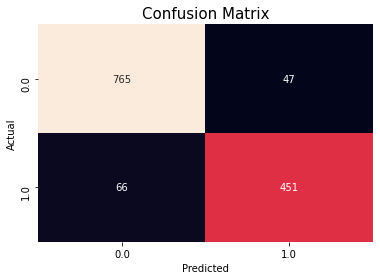

In [140]:
# Create confusion metrics
confusion_matrix =  pd.crosstab(index=np.ravel(y_val_cat), columns=pred_val_kpca2.ravel(), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [141]:
print(metrics.classification_report(y_true = pred_val_pca, y_pred = pred_val_kpca2))
met = metrics.classification_report(y_true = pred_val_pca, y_pred = pred_val_kpca2,  output_dict=True)
print("\nSummary of Metrics:")
print("Sensitivity %f"%(met['1.0']['recall']))
print("Specificity %f"%(met['0.0']['recall']))
print("Precision %f"%(met['1.0']['precision']))
print("Accuracy %f"%(met['accuracy']))
print("F1-score %f"%(met['1.0']['f1-score']))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       834
         1.0       0.98      0.98      0.98       495

    accuracy                           0.98      1329
   macro avg       0.98      0.98      0.98      1329
weighted avg       0.98      0.98      0.98      1329


Summary of Metrics:
Sensitivity 0.981818
Specificity 0.985612
Precision 0.975904
Accuracy 0.984199
F1-score 0.978852


## Q8 [10]

- Using the Support Vector Regressor:
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data or the Kernel PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - If both of them did not improve, comment on why this might have been the case. What else can be done?
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

In [142]:
#Possibilities one: Remove outliers 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
new_df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [143]:
new_df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000
mean,18.961726,1013.335317,68.036505,3.613334,25.965724,1080.207819,548.105844,133.371824,12.053777,2.701250,57.956808
std,7.291085,5.727596,13.816873,0.562190,3.879969,17.176065,3.189006,13.341493,0.962716,1.276189,8.126079
min,-3.303800,996.760000,29.270000,2.471700,17.972000,1037.200000,536.870000,100.470000,9.935800,0.212900,39.556000
25%,13.381750,1009.100000,58.163500,3.175300,23.388750,1072.900000,546.570000,128.610000,11.571000,1.733975,52.177750
50%,19.277500,1013.100000,70.276000,3.543950,25.299500,1080.300000,549.840000,131.555000,11.936000,2.319000,56.018000
75%,24.634750,1016.900000,79.396500,4.182075,29.734000,1099.700000,550.060000,145.957500,13.061250,3.523125,62.912000
max,36.264000,1031.200000,96.666000,4.901600,38.362000,1100.300000,550.590000,162.400000,13.807000,6.536900,84.120000


In [144]:
y_c = new_df.CO
X_c = new_df.drop(['CO', 'NOX'], axis=1)
from sklearn.model_selection import train_test_split
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_c, y_c, test_size=0.10, random_state=555)
X_train_clean, X_val_clean, y_train_clean, y_val_clean = train_test_split(X_train_clean, y_train_clean, test_size=0.30, random_state=555)

In [145]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
stand.fit(X_train_clean)
X_train_clean = stand.transform(X_train_clean)
X_val_clean = stand.transform(X_val_clean)
X_test_clean = stand.transform(X_test_clean)

In [149]:
svrreg = GridSearchCV(SVR(kernel='rbf'),param_grid={"C": [1, 10, 100, 1000],"gamma": [0.001, 0.01, 0.1, 1]}, scoring='r2')
svrreg.fit(X_train_clean, y_train_clean)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='r2')

In [150]:
svrreg.best_params_

{'C': 10, 'gamma': 0.1}

In [151]:
#What is the model R^2 on training data?
#What is the R^2 on validation data?
pred_train = svrreg.predict(X_train_clean)
pred_val = svrreg.predict(X_val_clean)

r2_train = metrics.r2_score(y_train_clean, pred_train)
r2_val = metrics.r2_score(y_val_clean, pred_val)
print("After clean the outliers, R2 on training data: ", r2_train )
print("After clean the outliers, R2 on validation data: ",r2_val)

After clean the outliers, R2 on training data:  0.8282792656132072
After clean the outliers, R2 on validation data:  0.8190355056103744


### After clean the outliers, the R^2 on both training data and validation data do have improve and the gap between these two is smaller.

In [152]:
#Possibilities two: change the degree
svrreg = GridSearchCV(SVR(kernel='rbf'),param_grid={"C": [1, 10, 100, 1000],"gamma": [0.001, 0.01, 0.1, 1], "degree":[2, 3, 4]}, cv = 5)
svrreg.fit(X_train_kpca2, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                         'gamma': [0.001, 0.01, 0.1, 1]})

In [154]:
svrreg.best_params_

{'C': 10, 'degree': 2, 'gamma': 1}

In [155]:
#What is the model R^2 on training data?
#What is the R^2 on validation data?
pred_train = svrreg.predict(X_train_kpca2)
pred_val = svrreg.predict(X_val_kpca2)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("After change the degree, R2 on training data: ", r2_train )
print("After change the degree, R2 on validation data: ",r2_val)

After change the degree, R2 on training data:  0.7860912319437882
After change the degree, R2 on validation data:  0.7500567754388686


### After change the degree, the R^2 on both training data and validation data doesn't change too many.

## Q9 [10]

- Using the Support Vector Classifier :
    - Think of other ways of improving the clasification performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data or the Kernel PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any classification performance metric that you deem to be appropriate.
    - If both of them did not improve, comment on why this might have been the case. What else can be done?
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

In [156]:
# YOUR CODE 
#Possibility one: Feature Selection
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X_train, y_train_cat)
imp = model.feature_importances_
feat_importances = pd.Series(imp, index=X.columns)

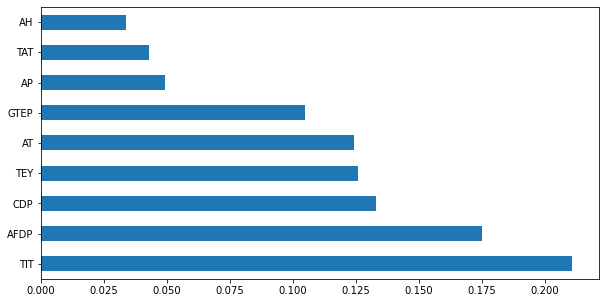

In [157]:
plt.figure(figsize=(10,5))
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [158]:
X = new_df.drop(['AH','TAT', 'AP', 'CO', 'NOX' ], axis=1)
y = new_df.CO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=555)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=555)
stand = StandardScaler()
stand.fit(X_train)
X_train = stand.transform(X_train)
X_val = stand.transform(X_val)
X_test = stand.transform(X_test)


from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=3)
binarizer.fit([y_train])
y_train_cat = binarizer.transform([y_train]).ravel()
y_val_cat = binarizer.transform([y_val]).ravel()
y_test_cat = binarizer.transform([y_test]).ravel()

In [173]:
svrreg = GridSearchCV(SVR(kernel='rbf'),param_grid={"C":[10],"gamma":[0.1]}, scoring='r2')
svrreg.fit(X_train, y_train_cat)

GridSearchCV(estimator=SVR(), param_grid={'C': [10], 'gamma': [0.1]},
             scoring='r2')

In [174]:
#What is the model R^2 on training data?
#What is the R^2 on validation data?
pred_train = svrreg.predict(X_train)
pred_val = svrreg.predict(X_val)

r2_train = metrics.r2_score(y_train_cat, pred_train)
r2_val = metrics.r2_score(y_val_cat, pred_val)
print("After Feature Selection, R2 on training data: ", r2_train )
print("After Feature Selection, R2 on validation data: ",r2_val)

After Feature Selection, R2 on training data:  0.7092838571374731
After Feature Selection, R2 on validation data:  0.6702572831488993


#### After feature selection, the result doen't improve.  

In [175]:
#possibility two: class weight
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train_cat),y_train_cat)
print(class_weights)

[0.77717609 1.40195369]


In [176]:
svrreg = SVC(kernel='rbf', C=10, gamma=0.01, class_weight={0: 0.77, 1: 1.4})
svrreg.fit(X_train, y_train_cat)

SVC(C=10, class_weight={0: 0.77, 1: 1.4}, gamma=0.01)

In [177]:
#What is the model R^2 on training data?
#What is the R^2 on validation data?
pred_train = svrreg.predict(X_train)
pred_val = svrreg.predict(X_val)

r2_train = metrics.r2_score(y_train_cat, pred_train)
r2_val = metrics.r2_score(y_val_cat, pred_val)
print("After class weight, R2 on training data: ", r2_train )
print("After class weight, R2 on validation data: ",r2_val)

After class weight, R2 on training data:  0.5546139900839573
After class weight, R2 on validation data:  0.5144410664172124


## Q10 [10]

- Choose the best 5 regressors among the trained regressions models:
- Create a table summarizing results on the **test** set for regression (with target variables in `y_test`):
    - Show the regression performance metric of your choice on test data for each model.
- Which model is best for regression? Is this in line with your analysis (the validation performance of the models) or is this not expected?



- Choose the best 5 classifiers among the trained classification models:
- Create a table summarizing results on the **test** set for classification (with target variables in `y_test_cat`):
    - Show the classification performance metric of your choice on test data for each model. 
- Which model is best for classification? Is this in line with your analysis (the validation performance of the models) or is this not expected? 



> Note that the same transformation used during training should be applied on the testing set. (If you applied PCA on training data for the selected model, you need to apply PCA on the testing set as well.) 



In [179]:
# YOUR CODE
r2 = []
rmse = []

linear = LinearRegression()
linear.fit(X_train, y_train)
y_test_lr = linear.predict(X_test)
r2.append(metrics.r2_score(y_test, y_test_lr))
rmse.append(metrics.mean_squared_error(y_test, y_test_lr, squared=False))

rf_reg = RandomForestRegressor(n_estimators=50,max_depth=4,random_state=RANDOM_STATE)
rf_reg.fit(X_train, y_train)
y_test_rfr = rf_reg.predict(X_test)
r2.append(metrics.r2_score(y_test, y_test_rfr))
rmse.append(metrics.mean_squared_error(y_test, y_test_rfr, squared=False))

svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train, y_train)
y_test_svr_linear = svr_linear.predict(X_test)
r2.append(metrics.r2_score(y_test, y_test_svr_linear))
rmse.append(metrics.mean_squared_error(y_test, y_test_svr_linear, squared=False))

svr_poly = SVR(kernel='poly',C=100,degree=2,gamma=1)
svr_poly.fit(X_train, y_train)
y_test_svr_poly = svr_poly.predict(X_test)
r2.append(metrics.r2_score(y_test, y_test_svr_poly))
rmse.append(metrics.mean_squared_error(y_test, y_test_svr_poly, squared=False))

svr_rbf = SVR(kernel='rbf',C=1000,gamma=0.01)
svr_rbf.fit(X_train, y_train)
y_test_svr_rbf = svr_rbf.predict(X_test)
r2.append(metrics.r2_score(y_test, y_test_svr_rbf))
rmse.append(metrics.mean_squared_error(y_test, y_test_svr_rbf, squared=False))

In [180]:
models = ['Linear Regression', 'RandomForest Regression','SVR linear', 'SVR poly', 'SVR rbf']
d = {'model': models, 'r2': r2, 'rmse': rmse}
df = pd.DataFrame(data=d)
df

,model,r2,rmse
0,Linear Regression,0.733294,0.624416
1,RandomForest Regression,0.778576,0.568944
2,SVR linear,0.733959,0.623637
3,SVR poly,0.389924,0.944386
4,SVR rbf,0.791249,0.552423


In [129]:
#SVR rbf is the best
print(metrics.classification_report(y_true = y_val_cat, y_pred = pred_val))
met = metrics.classification_report(y_true = y_val_cat, y_pred = pred_val,  output_dict=True)
print("\nSummary of Metrics:")
print("Sensitivity %f"%(met['1.0']['recall']))
print("Specificity %f"%(met['0.0']['recall']))
print("Precision %f"%(met['1.0']['precision']))
print("Accuracy %f"%(met['accuracy']))
print("F1-score %f"%(met['1.0']['f1-score']))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       812
         1.0       0.90      0.87      0.88       517

    accuracy                           0.91      1329
   macro avg       0.91      0.90      0.91      1329
weighted avg       0.91      0.91      0.91      1329


Summary of Metrics:
Sensitivity 0.868472
Specificity 0.938424
Precision 0.899800
Accuracy 0.911211
F1-score 0.883858


- What did you learn in this project? Any suggestions?

In [70]:
# Your comments
#In each situation, the results may difference becuase of some slight change. 
#Still need to practice in the future.

# Thank you
Ilyas Ustun  
twitter: \_ilyas\_ustun\_